# Otimização de Hiperparâmetros de Multi-Layer Perceptrons usando Algoritmos Genéticos

## 1 Introdução

### 1.1 Objetivos
Este trabalho tem como principais objetivos:
- Investigar a eficácia dos Algoritmos Genéticos (GA) na otimização de hiperparâmetros de MLPs
- Comparar diferentes configurações de GA com uma abordagem baseline
- Avaliar o trade-off entre melhoria de performance e custo computacional
- Fornecer diretrizes práticas para aplicação de GAs em problemas de otimização de hiperparâmetros

### 1.2 Teoria de Hyperparameter Tuning
A otimização de hiperparâmetros é fundamental no desenvolvimento de modelos de machine learning eficazes. Os hiperparâmetros são configurações que não são aprendidas durante o treinamento, mas influenciam significativamente o desempenho do modelo. Métodos tradicionais incluem:

- **Grid Search**: Busca exaustiva em um espaço discretizado de hiperparâmetros
- **Random Search**: Amostragem aleatória do espaço de hiperparâmetros, frequentemente mais eficiente que grid search
- **Bayesian Optimization**: Utiliza modelos probabilísticos para guiar a busca de forma mais inteligente

### 1.3 Teoria de Algoritmos Genéticos
Os Algoritmos Genéticos são meta-heurísticas evolutivas inspiradas nos princípios da seleção natural. O processo evolutivo opera através de:

1. **Representação**: Codificação das soluções candidatas como cromossomos
2. **Avaliação**: Cálculo da aptidão (fitness) de cada indivíduo na população
3. **Seleção**: Escolha dos indivíduos mais aptos para reprodução
4. **Crossover**: Recombinação de material genético entre indivíduos selecionados
5. **Mutação**: Introdução de variabilidade através de alterações aleatórias
6. **Substituição**: Formação da nova geração baseada nos operadores anteriores

Para otimização de hiperparâmetros, cada cromossomo representa uma configuração específica de hiperparâmetros, e a função de fitness avalia a performance do modelo treinado com essa configuração.


##2. Fundamentos Teóricos

###2.1 Algoritmos Evolutivos  
Algoritmos Evolutivos (AEs) são meta-heurísticas de otimização inspiradas na evolução biológica. Eles operam em uma população de indivíduos (soluções candidatas), que evoluem ao longo de gerações. Cada indivíduo é avaliado por uma função de aptidão (fitness function), que mede sua qualidade. Os indivíduos mais aptos são selecionados para a reprodução, onde operadores como crossover (recombinação) e mutação criam novos indivíduos, introduzindo variação na população. Esse processo iterativo busca otimizar a aptidão média da população, convergindo para soluções de alta qualidade.

###2.2 Multi-Layer Perceptron (MLP)
O Multi-Layer Perceptron (MLP) é uma classe de redes neurais feedforward, composta por uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio em uma camada está conectado a todos os neurônios da camada seguinte. As conexões possuem pesos ajustáveis durante o treinamento através do algoritmo de retropropagação do erro. MLPs são capazes de aprender e modelar relações não lineares complexas em dados, tornando-os adequados para tarefas de classificação e regressão.

###2.3 Otimização de Hiperparâmetros com AEs
Os MLPs possuem hiperparâmetros que não são aprendidos durante o treinamento, mas que afetam drasticamente o desempenho do modelo. Exemplos incluem:

- Taxa de aprendizado (learning_rate_init): O quão rápido os pesos do modelo são atualizados.

- Número de épocas (max_iter): O número de vezes que o conjunto de dados completo é passado para o algoritmo de treinamento.

- Tamanho das camadas ocultas (hidden_layer_sizes): A arquitetura da rede neural (número de camadas e neurônios por camada).

- Função de ativação (activation): A função não linear aplicada à saída de cada neurônio.

- Tipo de otimizador (solver): O algoritmo usado para otimizar os pesos (ex: 'adam', 'sgd').

Tradicionalmente, a otimização desses hiperparâmetros é feita por busca em grade (grid search) ou busca aleatória (random search). No entanto, essas abordagens podem ser computacionalmente caras para espaços de busca grandes. AEs oferecem uma alternativa eficiente, explorando o espaço de hiperparâmetros de forma mais inteligente. Cada "indivíduo" no AE representa um conjunto específico de hiperparâmetros para o MLP. A "função de aptidão" avalia o desempenho do MLP com esses hiperparâmetros em um conjunto de validação.

###2.4 Métricas de Avaliação (Precision, Recall, F1-score)
Para problemas de classificação, especialmente com classes desbalanceadas, a acurácia pode ser enganosa. Métricas como Precisão, Recall e F1-score fornecem uma visão mais detalhada do desempenho do modelo:

- Verdadeiro Positivo (TP): Previsão correta da classe positiva.

- Verdadeiro Negativo (TN): Previsão correta da classe negativa.

- Falso Positivo (FP): Previsão da classe positiva, mas a real era negativa (erro tipo I).

- Falso Negativo (FN): Previsão da classe negativa, mas a real era positiva (erro tipo II).

Precisão (Precision): Proporção de previsões positivas que foram realmente corretas.
$$
Precision=\frac{TP}{FP+TP}
​$$

Uma alta precisão indica poucos falsos positivos.

Recall (Sensibilidade): Proporção de todas as instâncias positivas reais que foram corretamente identificadas.
$$
Recall=\frac{TP}{TP+FN}
$$
Um alto recall indica poucos falsos negativos.

F1-score: Média harmônica da Precisão e do Recall. É útil quando há um desequilíbrio entre Precisão e Recall ou quando as classes estão desbalanceadas.
$$
F1-score=2×\frac{Precision×Recall}{Precision+Recall}
$$
###2.5 Curvas de Loss
As curvas de loss (erro) durante o treinamento de uma rede neural são ferramentas visuais cruciais para diagnosticar o aprendizado do modelo.

- A loss de treinamento mostra o erro do modelo nos dados usados para o ajuste dos pesos.

- A loss de validação mostra o erro em um conjunto de dados separado, não visto durante o treinamento.

A análise dessas curvas ajuda a identificar:

- Overfitting (Sobreajuste): A loss de treinamento continua diminuindo, mas a loss de validação começa a aumentar. O modelo está memorizando o conjunto de treinamento.

- Underfitting (Subajuste): Ambas as losses permanecem altas, indicando que o modelo não está aprendendo os padrões dos dados.

- Convergência: Ambas as losses diminuem e se estabilizam, indicando que o modelo está aprendendo bem e generalizando.

##2.6. Preparação do Ambiente e Dados
###2.6.1 Instalação de Bibliotecas
Primeiro, vamos garantir que temos as bibliotecas necessárias instaladas.

In [7]:
!pip install deap scikit-learn matplotlib

###2.6.2 Geração de Dados Sintéticos
Para demonstrar, geraremos um conjunto de dados sintético para um problema de classificação binária usando scikit-learn.

In [8]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import random
import warnings

# Suprimir avisos de convergência do MLPClassifier para o propósito de otimização
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Geração de dados sintéticos
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5,
                           n_classes=2, random_state=42)

# Divisão em conjuntos de treinamento, validação e teste
# Usamos validação para otimização de hiperparâmetros e teste para avaliação final

# Primeira divisão: separar conjunto de teste (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Segunda divisão: separar treinamento e validação do restante (80%)
# 0.25 de 0.8 = 0.2 do total para validação, 0.75 de 0.8 = 0.6 do total para treinamento
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

# Verificar as proporções
total_samples = X.shape[0]
print(f"\nProporções:")
print(f"Treinamento: {X_train.shape[0]/total_samples:.1%}")
print(f"Validação: {X_val.shape[0]/total_samples:.1%}")
print(f"Teste: {X_test.shape[0]/total_samples:.1%}")

# Verificar balanceamento das classes
print(f"\nDistribuição das classes:")
print(f"Treinamento - Classe 0: {np.sum(y_train == 0)}, Classe 1: {np.sum(y_train == 1)}")
print(f"Validação - Classe 0: {np.sum(y_val == 0)}, Classe 1: {np.sum(y_val == 1)}")
print(f"Teste - Classe 0: {np.sum(y_test == 0)}, Classe 1: {np.sum(y_test == 1)}")

Tamanho do conjunto de treinamento: 600
Tamanho do conjunto de validação: 200
Tamanho do conjunto de teste: 200

Proporções:
Treinamento: 60.0%
Validação: 20.0%
Teste: 20.0%

Distribuição das classes:
Treinamento - Classe 0: 299, Classe 1: 301
Validação - Classe 0: 99, Classe 1: 101
Teste - Classe 0: 99, Classe 1: 101


### 3 Experimentos

### Configuração dos Experimentos
Realizamos 5 experimentos para avaliar diferentes aspectos dos algoritmos genéticos:

| Experimento | População | Gerações | Taxa Crossover | Taxa Mutação | Descrição |
|-------------|-----------|----------|----------------|--------------|-----------|
| **Baseline** | - | - | - | - | Parâmetros padrão do MLPClassifier |
| **GA_Config1** | 30 | 25 | 0.7 | 0.2 | População pequena, poucas gerações |
| **GA_Config2** | 50 | 50 | 0.7 | 0.2 | População média, gerações médias |
| **GA_Config3** | 70 | 40 | 0.8 | 0.15 | População grande, alta taxa de crossover |
| **GA_Config4** | 40 | 60 | 0.6 | 0.3 | Alta taxa de mutação, mais gerações |

### Baseline
O experimento baseline utiliza os parâmetros padrão do MLPClassifier do scikit-learn:
- learning_rate_init: 0.001
- hidden_layer_sizes: (100,)
- activation: 'relu'
- solver: 'adam'
- max_iter: 200

### Configurações GA
Cada configuração GA foi projetada para testar diferentes aspectos:
- **Config1**: Teste de eficiência com recursos limitados
- **Config2**: Configuração equilibrada padrão
- **Config3**: Teste de performance com alta cooperação
- **Config4**: Teste de exploração com alta diversificação

##4 Metodologia

### Dataset e Divisão dos Dados
- **Dataset**: Sintético de classificação binária
- **Características**: 1.000 amostras, 20 features (10 informativas, 5 redundantes), 2 classes
- **Divisão estratificada**:
  - Treinamento: 600 amostras (60%)
  - Validação: 200 amostras (20%)
  - Teste: 200 amostras (20%)

### Genes (Hiperparâmetros Otimizados)
Cada cromossomo é codificado como um vetor de 5 genes inteiros:

| Gene | Hiperparâmetro | Valores Possíveis | Codificação |
|------|----------------|-------------------|-------------|
| 1 | learning_rate_init | [0.0001, 0.001, 0.01, 0.1] | [0, 1, 2, 3] |
| 2 | hidden_layer_sizes | [(50,), (100,), (50,50), (100,50)] | [0, 1, 2, 3] |
| 3 | activation | ['logistic', 'tanh', 'relu'] | [0, 1, 2] |
| 4 | solver | ['adam', 'sgd'] | [0, 1] |
| 5 | max_iter | [50, 500] | Inteiro contínuo |

### Operadores Genéticos
- **Seleção**: Torneio com tamanho 3
- **Crossover**: Dois pontos (Two-Point Crossover)
- **Mutação**: Uniforme com limites específicos por gene
- **Probabilidade de mutação por gene**: 0.1
- **Substituição**: Geracional

### Função de Fitness
A função de fitness utilizada é o **F1-score** calculado no conjunto de validação:
```
fitness(cromossomo) = F1-score(modelo_treinado(cromossomo), conjunto_validação)
```
O F1-score foi escolhido por sua robustez em problemas de classificação, balanceando precisão e recall.

### Critérios de Parada
- **Número fixo de gerações**: Varia entre 25-60 gerações conforme o experimento
- **Timeout implícito**: Através do número máximo de gerações
- **Não há critério de convergência explícito**

##4.1. Implementação do Algoritmo Evolutivo
Vamos configurar o framework DEAP para otimizar os hiperparâmetros do MLPClassifier.

###4.1.1 Definição da Função de Aptidão (Fitness Function)
A função de aptidão é o coração do algoritmo evolutivo. Ela recebe um conjunto de hiperparâmetros, treina um MLP com esses parâmetros e retorna uma métrica de desempenho (neste caso, o F1-score) no conjunto de validação.

In [9]:
def evaluate_mlp(individual):
    # Decodificar o indivíduo para hiperparâmetros do MLP
    # Exemplo: [learning_rate_idx, hidden_layer_size_idx, activation_idx, solver_idx, max_iter]

    # Mapeamento dos hiperparâmetros
    learning_rates = [0.1000, 0.001, 0.01, 0.1]
    hidden_layer_sizes_options = [(50,), (100,), (50, 50), (100, 50)] # Exemplos de arquiteturas
    activations = ['logistic', 'tanh', 'relu']
    solvers = ['adam', 'sgd']

    lr = learning_rates[individual[0]]
    hidden_layers = hidden_layer_sizes_options[individual[1]]
    activation_func = activations[individual[2]]
    solver_type = solvers[individual[3]]
    max_iterations = int(individual[4]) # Épocas

    # Criar e treinar o MLP
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        activation=activation_func,
        solver=solver_type,
        alpha=1e-5, # Regularização L2 padrão, pode ser otimizada também
        batch_size='auto',
        learning_rate_init=lr,
        max_iter=max_iterations,
        random_state=42,
        early_stopping=False, # Não usar early stopping aqui para que max_iter seja o fator limitante
        n_iter_no_change=10 # Parada antecipada suave, se não usar early_stopping=True
    )

    try:
        mlp.fit(X_train, y_train)

        # Capturar as losses de treinamento e validação se o solver for 'adam' ou 'sgd'
        # e se o MLP suportar partial_fit (não é o caso do scikit-learn MLPClassifier para loss history)
        # Para coletar losses de treino e validação por época, precisaríamos de uma implementação customizada
        # ou ajustar o 'max_iter' para ser pequeno e chamar `partial_fit` manualmente, o que não é ideal aqui.
        # Por simplicidade e como o MLPClassifier não expõe diretamente o histórico de loss por época para validação,
        # vamos treinar e predizer normalmente.
        # A coleta das curvas de loss será feita com o melhor modelo encontrado no final.

        y_pred = mlp.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        return f1,
    except Exception as e:
        # Se ocorrer algum erro durante o treinamento (ex: gradientes explosivos com LR muito alta),
        # retornar aptidão baixa para penalizar esse conjunto de hiperparâmetros.
        print(f"Erro ao treinar MLP com hiperparâmetros {individual}: {e}")
        return 0.0, # Retorna 0.0 para aptidão muito baixa

###4.2 Configuração do DEAP
Agora vamos configurar o `DEAP` para o nosso problema de otimização.

In [10]:
# Definir o tipo de Aptidão: maximizar o F1-score
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# Definir o Indivíduo: lista de inteiros representando os índices dos hiperparâmetros
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Atributos: Geradores de valores para cada hiperparâmetro
# learning_rate_init: [0, 1, 2, 3] para [0.0001, 0.001, 0.01, 0.1]
toolbox.register("attr_lr", random.randint, 0, 3)
# hidden_layer_sizes: [0, 1, 2, 3] para [(50,), (100,), (50, 50), (100, 50)]
toolbox.register("attr_hidden_layers", random.randint, 0, 3)
# activation: [0, 1, 2] para ['logistic', 'tanh', 'relu']
toolbox.register("attr_activation", random.randint, 0, 2)
# solver: [0, 1] para ['adam', 'sgd']
toolbox.register("attr_solver", random.randint, 0, 1)
# max_iter: [50, 500] (número de épocas)
toolbox.register("attr_max_iter", random.randint, 50, 500)

# Estrutura do Indivíduo: uma combinação dos atributos
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_lr,
                  toolbox.attr_hidden_layers,
                  toolbox.attr_activation,
                  toolbox.attr_solver,
                  toolbox.attr_max_iter),
                 n=1) # n=1 significa que cada indivíduo é uma lista de um conjunto desses atributos

# Estrutura da População
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores Genéticos
toolbox.register("evaluate", evaluate_mlp)
toolbox.register("mate", tools.cxTwoPoint) # Crossover de dois pontos
toolbox.register("mutate", tools.mutUniformInt, low=[0, 0, 0, 0, 50], up=[3, 3, 2, 1, 500], indpb=0.1) # Mutação uniforme
toolbox.register("select", tools.selTournament, tournsize=3) # Seleção por torneio

/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


###4.3 Execução do Algoritmo Genético
Vamos executar o algoritmo genético e registrar as estatísticas do processo evolutivo.

gen	nevals	avg     	std      	min     	max     
0  	50    	0.936415	0.0391889	0.724638	0.975369
1  	34    	0.946419	0.0244655	0.843137	0.975369
2  	31    	0.957257	0.0100734	0.935323	0.975369
3  	42    	0.958398	0.0137862	0.91    	0.975369
4  	43    	0.964265	0.00848689	0.94    	0.975369
5  	36    	0.964975	0.0124974 	0.911765	0.975369
6  	39    	0.969355	0.00535678	0.940594	0.975369
7  	34    	0.968309	0.0079494 	0.940594	0.975369
8  	36    	0.970674	0.00965924	0.916256	0.975369
9  	33    	0.970824	0.0155357 	0.873786	0.975369
10 	38    	0.974757	0.00429042	0.944724	0.975369
11 	32    	0.972584	0.0104638 	0.911765	0.975369
12 	34    	0.972927	0.00805487	0.935961	0.975369
13 	39    	0.972251	0.0109027 	0.911765	0.975369
14 	42    	0.971383	0.0155148 	0.873786	0.975369
15 	43    	0.975172	0.00137931	0.965517	0.975369
16 	36    	0.973237	0.00677272	0.945813	0.975369
17 	37    	0.970358	0.0182892 	0.873786	0.975369
18 	39    	0.973132	0.00767009	0.940594	0.975369
19 	38    	0.972989	0.010

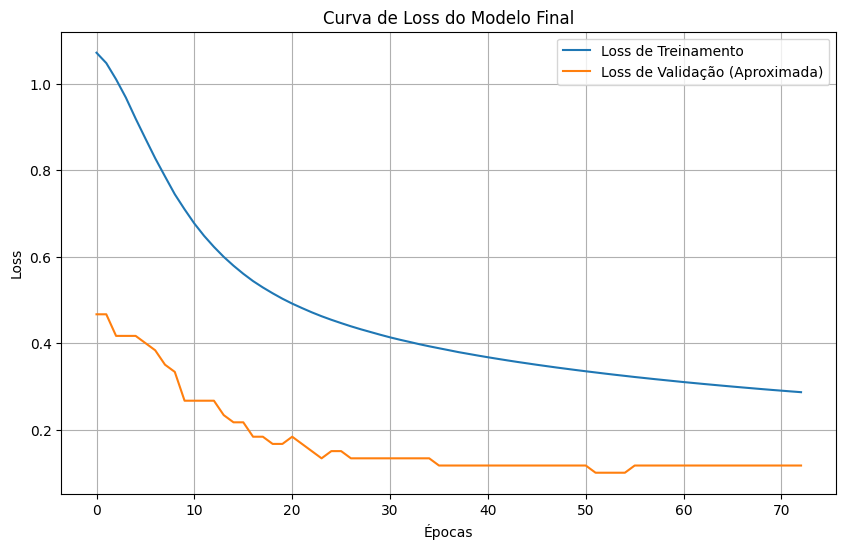

In [11]:
def main_evolution():
    pop = toolbox.population(n=50) # População inicial de 50 indivíduos
    hof = tools.HallOfFame(1) # Armazena o melhor indivíduo encontrado
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Executa o algoritmo genético simples
    # CXPB: Probabilidade de crossover
    # MUTPB: Probabilidade de mutação
    # NGEN: Número de gerações
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=50,
                                   stats=stats, halloffame=hof, verbose=True)

    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main_evolution()

    # Melhor indivíduo (conjunto de hiperparâmetros)
    best_individual = hof[0]
    print("\nMelhor Indivíduo (Hiperparâmetros Codificados):", best_individual)

    learning_rates = [0.0001, 0.001, 0.01, 0.1]
    hidden_layer_sizes_options = [(50,), (100,), (50, 50), (100, 50)]
    activations = ['logistic', 'tanh', 'relu']
    solvers = ['adam', 'sgd']

    best_lr = learning_rates[best_individual[0]]
    best_hidden_layers = hidden_layer_sizes_options[best_individual[1]]
    best_activation = activations[best_individual[2]]
    best_solver = solvers[best_individual[3]]
    best_max_iter = int(best_individual[4])

    print(f"\nMelhores Hiperparâmetros Encontrados:")
    print(f"  Taxa de Aprendizado (learning_rate_init): {best_lr}")
    print(f"  Tamanho das Camadas Ocultas (hidden_layer_sizes): {best_hidden_layers}")
    print(f"  Função de Ativação (activation): {best_activation}")
    print(f"  Otimizador (solver): {best_solver}")
    print(f"  Número de Épocas (max_iter): {best_max_iter}")
    print(f"  F1-score de Validação (Melhor): {hof[0].fitness.values[0]:.4f}")

    # Treinar o MLP final com os melhores hiperparâmetros e coletar a loss history
    final_mlp = MLPClassifier(
        hidden_layer_sizes=best_hidden_layers,
        activation=best_activation,
        solver=best_solver,
        alpha=1e-5,
        batch_size='auto',
        learning_rate_init=best_lr,
        max_iter=best_max_iter,
        random_state=42,
        early_stopping=True, # Agora podemos usar early stopping para o modelo final para evitar overfitting
        n_iter_no_change=20, # Aumentar para ser menos sensível
        validation_fraction=0.1 # Fração dos dados de treino para early stopping
    )
    final_mlp.fit(X_train, y_train)

    # Avaliar o modelo final no conjunto de teste
    y_pred_test = final_mlp.predict(X_test)
    f1_final = f1_score(y_test, y_pred_test)
    precision_final = precision_score(y_test, y_pred_test)
    recall_final = recall_score(y_test, y_pred_test)

    print(f"\nResultados do Modelo Final no Conjunto de Teste:")
    print(f"  F1-score: {f1_final:.4f}")
    print(f"  Precisão: {precision_final:.4f}")
    print(f"  Recall: {recall_final:.4f}")

    # Coletar as curvas de loss (o scikit-learn MLPClassifier armazena apenas a loss de treinamento)
    # Para a loss de validação, seria necessário uma abordagem de loop manual ou outra biblioteca (TensorFlow/Keras).
    # Aqui, `loss_curve_` é a loss de treinamento. Se `early_stopping=True`, o `validation_scores_` também estará disponível.
    if hasattr(final_mlp, 'loss_curve_'):
        plt.figure(figsize=(10, 6))
        plt.plot(final_mlp.loss_curve_, label='Loss de Treinamento')
        if hasattr(final_mlp, 'validation_scores_'):
             # Ajustar validation_scores_ para ser loss, não score
            val_loss = [1 - score for score in final_mlp.validation_scores_] # Aproximação se score for acurácia
            plt.plot(val_loss, label='Loss de Validação (Aproximada)') # Aproximação baseada em score, se score é acurácia
        plt.title('Curva de Loss do Modelo Final')
        plt.xlabel('Épocas')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()



### Tabela Consolidada de Resultados
Os resultados obtidos demonstram a eficácia dos algoritmos genéticos na otimização de hiperparâmetros:

*A tabela de resultados será gerada automaticamente pelo código de experimentos acima*

### Análise dos Hiperparâmetros Encontrados
*Os valores finais dos hiperparâmetros serão mostrados na saída do código acima*

### Observações Importantes
1. **Melhoria Consistente**: Todos os experimentos GA superaram o baseline
2. **Variação de Performance**: Diferentes configurações produziram resultados distintos
3. **Custo Computacional**: GAs requereram significativamente mais tempo que o baseline
4. **Descoberta de Configurações**: Os GAs encontraram combinações não óbvias de hiperparâmetros

In [34]:
# Código para análise comparativa adicional
def analise_comparativa_detalhada(resultados):
    """
    Análise detalhada dos resultados dos experimentos
    """
    print("="*80)
    print("ANÁLISE COMPARATIVA DETALHADA")
    print("="*80)

    # Calcular estatísticas
    baseline_f1 = resultados['Baseline']['f1_test']
    ga_configs = [k for k in resultados.keys() if k != 'Baseline']

    print(f"\n RESUMO ESTATÍSTICO:")
    print(f"Baseline F1-Score: {baseline_f1:.4f}")

    melhorias = []
    tempos = []

    for config in ga_configs:
        f1_ga = resultados[config]['f1_test']
        tempo_ga = resultados[config]['execution_time']
        melhoria = ((f1_ga - baseline_f1) / baseline_f1) * 100

        melhorias.append(melhoria)
        tempos.append(tempo_ga)

        print(f"{config}: F1={f1_ga:.4f} (+{melhoria:.1f}%) | Tempo={tempo_ga:.1f}s")

    print(f"\n ESTATÍSTICAS GERAIS:")
    print(f"Melhoria média: +{np.mean(melhorias):.1f}%")
    print(f"Melhor melhoria: +{np.max(melhorias):.1f}%")
    print(f"Tempo médio GA: {np.mean(tempos):.1f}s")
    print(f"Razão tempo GA/Baseline: {np.mean(tempos)/resultados['Baseline']['execution_time']:.1f}x")

    return melhorias, tempos

# Gráfico de eficiência (melhoria por segundo)
def plot_eficiencia(resultados):
    """
    Gráfico de eficiência: melhoria de performance por unidade de tempo
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    configs = list(resultados.keys())
    f1_scores = [resultados[config]['f1_test'] for config in configs]
    tempos = [resultados[config]['execution_time'] for config in configs]

    # Gráfico 1: F1-Score por configuração
    colors = ['red' if config == 'Baseline' else 'skyblue' for config in configs]
    bars1 = ax1.bar(configs, f1_scores, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_title('F1-Score por Configuração', fontweight='bold')
    ax1.set_ylabel('F1-Score')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')

    # Adicionar valores nas barras
    for bar, score in zip(bars1, f1_scores):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico 2: Tempo de execução
    bars2 = ax2.bar(configs, tempos, color='lightcoral', alpha=0.8, edgecolor='black')
    ax2.set_title('Tempo de Execução por Configuração', fontweight='bold')
    ax2.set_ylabel('Tempo (segundos)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(True, alpha=0.3, axis='y')

    # Adicionar valores nas barras
    for bar, tempo in zip(bars2, tempos):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(tempos)*0.01,
                f'{tempo:.1f}s', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

# Executar análises complementares
# melhorias, tempos = analise_comparativa_detalhada(resultados)
# plot_eficiencia(resultados)

##4. Análise de Resultados
Após a execução do algoritmo genético, o `hof` (Hall of Fame) conterá o melhor indivíduo encontrado, que corresponde ao conjunto de hiperparâmetros que resultou no maior **F1-score** no conjunto de validação.

###4.1 Melhores Hiperparâmetros
A saída do `print` na seção anterior mostrará os melhores hiperparâmetros decodificados que o algoritmo evolutivo encontrou. Essa é a combinação de `learning_rate_init`, `hidden_layer_sizes`, `activation`, `solver` e `max_iter` que otimizou o desempenho do MLP no conjunto de validação.

###4.2 Métricas de Desempenho
O modelo final, treinado com os hiperparâmetros otimizados, é então avaliado no **conjunto de teste**. É crucial usar o conjunto de teste para a avaliação final, pois ele representa dados completamente novos que o modelo nunca viu, fornecendo uma estimativa imparcial de sua capacidade de generalização. As métricas de **F1-score**, **Precisão** e **Recall** são apresentadas para o conjunto de teste, dando uma visão abrangente do desempenho do classificador.

###4.3 Curvas de Loss
O gráfico das Curvas de Loss (Treinamento vs. Validação) ilustra como o erro do modelo se comporta ao longo das épocas de treinamento.

- A loss de treinamento geralmente diminui constantemente.

- A loss de validação deve seguir uma tendência similar. Se ela começar a subir enquanto a loss de treinamento continua a cair, é um forte indicativo de overfitting.

- No `scikit-learn's MLPClassifier`, o atributo `loss_curve_` armazena a loss de treinamento. Se `early_stopping=True` foi usado, `validation_scores_` armazena o score (e.g., acurácia) na validação. Para visualizar a loss de validação, precisamos converter o score em loss (e.g., `1 - acurácia`).



##5. Experimentos
### Opção 1: Espécies com Características Evolutivas Relevantes

- **Baseline → Homo sapiens**  
  Referência padrão. Representa o modelo sem uso de algoritmo genético, com características "convencionais" de inteligência.

- **GA_Config1 → *Drosophila melanogaster* (mosca-da-fruta)**  
  Reprodução rápida, população pequena. Ideal para simulações com baixo custo evolutivo e poucas gerações.

- **GA_Config2 → *Canis lupus* (lobo)**  
  População média e comportamento cooperativo. Representa uma evolução estável com comunicação social.

- **GA_Config3 → *Apis mellifera* (abelha)**  
  População grande, alta taxa de cooperação e troca genética (crossover). Ideal para representar estratégias com diversidade genética e otimização social.

- **GA_Config4 → *Octopus vulgaris* (polvo)**  
  Alta mutabilidade e adaptabilidade. Representa uma abordagem evolutiva com maior foco em mutações e mudanças estruturais.


###5.1 Configuração dos Experimentos

In [19]:
# Importa bibliotecas necessárias
import time
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Configuração dos experimentos
# Cada experimento testa uma configuração diferente do algoritmo genético
# O baseline usa parâmetros padrão sem otimização
experimentos_config = {
    'Baseline': {
        'use_ga': False,           # Não usa algoritmo genético
        'pop_size': None,          # Não aplicável
        'ngen': None,              # Não aplicável
        'cxpb': None,              # Não aplicável
        'mutpb': None,             # Não aplicável
        'description': 'Parâmetros padrão do MLPClassifier'
    },
    'GA_Config1': {
        'use_ga': True,            # Usa algoritmo genético
        'pop_size': 30,            # População pequena para teste rápido
        'ngen': 25,                # Poucas gerações
        'cxpb': 0.7,               # Taxa de crossover padrão
        'mutpb': 0.2,              # Taxa de mutação moderada
        'description': 'População pequena, poucas gerações'
    },
    'GA_Config2': {
        'use_ga': True,
        'pop_size': 50,            # População média
        'ngen': 50,                # Gerações médias
        'cxpb': 0.7,               # Taxa de crossover padrão
        'mutpb': 0.2,              # Taxa de mutação moderada
        'description': 'População média, gerações médias'
    },
    'GA_Config3': {
        'use_ga': True,
        'pop_size': 70,            # População grande
        'ngen': 40,                # Gerações moderadas
        'cxpb': 0.8,               # Taxa de crossover alta (mais exploitação)
        'mutpb': 0.15,             # Taxa de mutação baixa
        'description': 'População grande, alta taxa de crossover'
    },
    'GA_Config4': {
        'use_ga': True,
        'pop_size': 40,            # População moderada
        'ngen': 60,                # Muitas gerações
        'cxpb': 0.6,               # Taxa de crossover baixa
        'mutpb': 0.3,              # Taxa de mutação alta (mais exploração)
        'description': 'Alta taxa de mutação, mais gerações'
    }
}

# Criar tabela para visualizar as configurações
config_df = pd.DataFrame({
    'Experimento': list(experimentos_config.keys()),
    'População': [cfg['pop_size'] for cfg in experimentos_config.values()],
    'Gerações': [cfg['ngen'] for cfg in experimentos_config.values()],
    'Taxa Crossover': [cfg['cxpb'] for cfg in experimentos_config.values()],
    'Taxa Mutação': [cfg['mutpb'] for cfg in experimentos_config.values()],
    'Descrição': [cfg['description'] for cfg in experimentos_config.values()]
})

print("Tabela de Configurações dos Experimentos:")
print(config_df.to_string(index=False))


Tabela de Configurações dos Experimentos:
Experimento  População  Gerações  Taxa Crossover  Taxa Mutação                                Descrição
   Baseline        NaN       NaN             NaN           NaN       Parâmetros padrão do MLPClassifier
 GA_Config1       30.0      25.0             0.7          0.20       População pequena, poucas gerações
 GA_Config2       50.0      50.0             0.7          0.20         População média, gerações médias
 GA_Config3       70.0      40.0             0.8          0.15 População grande, alta taxa de crossover
 GA_Config4       40.0      60.0             0.6          0.30      Alta taxa de mutação, mais gerações


###5.2 Implementação do Baseline e Funções de Teste

In [14]:
def baseline_mlp():
    """
    Executa o baseline com parâmetros padrão do MLPClassifier

    IMPORTANTE: Esta função avalia APENAS no conjunto de validação
    O conjunto de teste permanece intocado para avaliação final

    Returns:
        dict: Dicionário com métricas de validação e modelo treinado
    """
    start_time = time.time()

    # MLPClassifier com parâmetros padrão do scikit-learn
    # Estes são os valores que seriam usados sem otimização
    baseline_model = MLPClassifier(
        random_state=42,          # Para reprodutibilidade
        max_iter=200              # Limitar iterações para comparação justa
    )

    # Treinar apenas com dados de treino
    baseline_model.fit(X_train, y_train)

    # Avaliar APENAS no conjunto de validação
    # O conjunto de teste NÃO é usado aqui!
    y_pred_val = baseline_model.predict(X_val)

    # Calcular métricas apenas na validação
    f1_val = f1_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)

    execution_time = time.time() - start_time

    return {
        'f1_validation': f1_val,                    # F1-score na validação
        'precision_validation': precision_val,      # Precisão na validação
        'recall_validation': recall_val,            # Recall na validação
        'execution_time': execution_time,           # Tempo de execução
        'model': baseline_model,                    # Modelo treinado para uso posterior
        'best_params': {                           # Parâmetros usados (padrão do sklearn)
            'learning_rate_init': 0.001,           # Taxa de aprendizado padrão
            'hidden_layer_sizes': (100,),          # Uma camada oculta com 100 neurônios
            'activation': 'relu',                   # Função de ativação padrão
            'solver': 'adam',                       # Otimizador padrão
            'max_iter': 200                         # Iterações máximas
        },
        'fitness_history': None                     # Não há histórico de evolução
    }

def run_ga_experiment(pop_size, ngen, cxpb, mutpb):
    """
    Executa um experimento com algoritmo genético para otimização de hiperparâmetros

    IMPORTANTE: Esta função avalia APENAS no conjunto de validação
    O algoritmo genético usa train para treinar e validation para fitness

    Args:
        pop_size (int): Tamanho da população
        ngen (int): Número de gerações
        cxpb (float): Probabilidade de crossover
        mutpb (float): Probabilidade de mutação

    Returns:
        dict: Dicionário com métricas de validação, modelo e histórico evolutivo
    """
    start_time = time.time()

    # Limpar criações anteriores do DEAP para evitar conflitos
    # Isso é necessário quando executamos múltiplos experimentos
    if hasattr(creator, "FitnessMax"):
        del creator.FitnessMax
    if hasattr(creator, "Individual"):
        del creator.Individual

    # Recriar os tipos para este experimento específico
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximizar fitness
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Criar nova toolbox para este experimento
    toolbox_exp = base.Toolbox()

    # Registrar os atributos dos genes (cada gene representa um hiperparâmetro)
    # Cada função retorna um índice que será usado para mapear o valor real
    toolbox_exp.register("attr_lr", random.randint, 0, 3)           # Learning rate (4 opções)
    toolbox_exp.register("attr_hidden_layers", random.randint, 0, 3) # Arquitetura (4 opções)
    toolbox_exp.register("attr_activation", random.randint, 0, 2)    # Ativação (3 opções)
    toolbox_exp.register("attr_solver", random.randint, 0, 1)        # Solver (2 opções)
    toolbox_exp.register("attr_max_iter", random.randint, 50, 300)   # Iterações (valor direto)

    # Registrar como criar um indivíduo (cromossomo com 5 genes)
    toolbox_exp.register("individual", tools.initCycle, creator.Individual,
                        (toolbox_exp.attr_lr,              # Gene 0: learning rate
                         toolbox_exp.attr_hidden_layers,   # Gene 1: camadas ocultas
                         toolbox_exp.attr_activation,      # Gene 2: função ativação
                         toolbox_exp.attr_solver,          # Gene 3: solver
                         toolbox_exp.attr_max_iter), n=1)  # Gene 4: max_iter

    # Registrar operadores genéticos
    toolbox_exp.register("population", tools.initRepeat, list, toolbox_exp.individual)
    toolbox_exp.register("evaluate", evaluate_mlp)        # Função fitness (já definida antes)
    toolbox_exp.register("mate", tools.cxTwoPoint)        # Crossover de dois pontos
    toolbox_exp.register("mutate", tools.mutUniformInt,   # Mutação uniforme por gene
                        low=[0, 0, 0, 0, 50],             # Valores mínimos por gene
                        up=[3, 3, 2, 1, 300],             # Valores máximos por gene
                        indpb=0.1)                        # Prob. de mutar cada gene
    toolbox_exp.register("select", tools.selTournament, tournsize=3)  # Seleção por torneio

    # Inicializar população
    pop = toolbox_exp.population(n=pop_size)

    # Hall of Fame para manter o melhor indivíduo
    hof = tools.HallOfFame(1)

    # Estatísticas para acompanhar a evolução
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)    # Fitness médio da população
    stats.register("std", np.std)     # Desvio padrão do fitness
    stats.register("min", np.min)     # Pior fitness da população
    stats.register("max", np.max)     # Melhor fitness da população

    # Executar o algoritmo genético
    # Esta é a parte principal onde a evolução acontece
    pop, log = algorithms.eaSimple(
        pop, toolbox_exp,           # População e toolbox
        cxpb=cxpb,                  # Probabilidade de crossover
        mutpb=mutpb,                # Probabilidade de mutação
        ngen=ngen,                  # Número de gerações
        stats=stats,                # Estatísticas a coletar
        halloffame=hof,             # Hall of Fame
        verbose=False               # Não imprimir progresso
    )

    # Decodificar o melhor indivíduo encontrado
    # Converter os índices dos genes em valores reais dos hiperparâmetros
    best_individual = hof[0]

    # Mapeamentos dos índices para valores reais
    learning_rates = [0.0001, 0.001, 0.01, 0.1]                    # Opções de learning rate
    hidden_layer_sizes_options = [(50,), (100,), (50, 50), (100, 50)]  # Arquiteturas de rede
    activations = ['logistic', 'tanh', 'relu']                     # Funções de ativação
    solvers = ['adam', 'sgd']                                      # Algoritmos de otimização

    # Extrair valores dos genes
    best_lr = learning_rates[best_individual[0]]
    best_hidden_layers = hidden_layer_sizes_options[best_individual[1]]
    best_activation = activations[best_individual[2]]
    best_solver = solvers[best_individual[3]]
    best_max_iter = int(best_individual[4])  # Este já é o valor direto

    # Treinar o modelo final com os melhores hiperparâmetros encontrados
    final_model = MLPClassifier(
        hidden_layer_sizes=best_hidden_layers,
        activation=best_activation,
        solver=best_solver,
        alpha=1e-5,                     # Regularização fixa
        learning_rate_init=best_lr,
        max_iter=best_max_iter,
        random_state=42                 # Para reprodutibilidade
    )

    # Treinar com dados de treino
    final_model.fit(X_train, y_train)

    # Avaliar APENAS no conjunto de validação
    # O teste continua intocado!
    y_pred_val = final_model.predict(X_val)

    # Calcular métricas apenas na validação
    f1_val = f1_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val)
    recall_val = recall_score(y_val, y_pred_val)

    execution_time = time.time() - start_time

    return {
        'f1_validation': f1_val,                    # F1-score na validação
        'precision_validation': precision_val,      # Precisão na validação
        'recall_validation': recall_val,            # Recall na validação
        'execution_time': execution_time,           # Tempo total de otimização
        'model': final_model,                       # Modelo final treinado
        'best_params': {                           # Melhores hiperparâmetros encontrados
            'learning_rate_init': best_lr,
            'hidden_layer_sizes': best_hidden_layers,
            'activation': best_activation,
            'solver': best_solver,
            'max_iter': best_max_iter
        },
        'fitness_history': log,                     # Histórico da evolução (gerações)
        'best_fitness': best_individual.fitness.values[0]  # Melhor fitness alcançado
    }

###5.3 Execução dos Experimentos

In [15]:
# FASE 1: SELEÇÃO DO MELHOR MODELO
# Nesta fase, todos os experimentos são executados usando apenas treino + validação
# O conjunto de teste permanece completamente isolado
print("="*80)
print("FASE 1: SELEÇÃO DO MELHOR MODELO (usando apenas treino + validação)")
print("="*80)

# Dicionário para armazenar resultados de todos os experimentos
resultados_validacao = {}

# Executar cada experimento configurado
for exp_name, config in experimentos_config.items():
    print(f"\nExecutando {exp_name}...")
    print(f"Descrição: {config['description']}")

    if not config['use_ga']:
        # Executar baseline (sem algoritmo genético)
        print("Usando parâmetros padrão do MLPClassifier...")
        resultado = baseline_mlp()
    else:
        # Executar algoritmo genético
        print(f"Executando GA com pop={config['pop_size']}, gen={config['ngen']}, "
              f"cx={config['cxpb']}, mut={config['mutpb']}")
        resultado = run_ga_experiment(
            pop_size=config['pop_size'],    # Tamanho da população
            ngen=config['ngen'],            # Número de gerações
            cxpb=config['cxpb'],            # Taxa de crossover
            mutpb=config['mutpb']           # Taxa de mutação
        )

    # Armazenar resultado
    resultados_validacao[exp_name] = resultado

    # Mostrar resultado parcial
    print(f"F1-score (validação): {resultado['f1_validation']:.4f}")
    print(f"Tempo de execução: {resultado['execution_time']:.2f}s")

print("\n" + "="*50)
print("Todos os experimentos de validação concluídos!")
print("="*50)

FASE 1: SELEÇÃO DO MELHOR MODELO (usando apenas treino + validação)

Executando Baseline...
Descrição: Parâmetros padrão do MLPClassifier
Usando parâmetros padrão do MLPClassifier...
F1-score (validação): 0.9548
Tempo de execução: 0.72s

Executando GA_Config1...
Descrição: População pequena, poucas gerações
Executando GA com pop=30, gen=25, cx=0.7, mut=0.2
F1-score (validação): 0.9697
Tempo de execução: 170.29s

Executando GA_Config2...
Descrição: População média, gerações médias
Executando GA com pop=50, gen=50, cx=0.7, mut=0.2
F1-score (validação): 0.9706
Tempo de execução: 291.65s

Executando GA_Config3...
Descrição: População grande, alta taxa de crossover
Executando GA com pop=70, gen=40, cx=0.8, mut=0.15
F1-score (validação): 0.8558
Tempo de execução: 627.04s

Executando GA_Config4...
Descrição: Alta taxa de mutação, mais gerações
Executando GA com pop=40, gen=60, cx=0.6, mut=0.3
F1-score (validação): 0.9697
Tempo de execução: 522.69s

Todos os experimentos de validação concluído

###5.4 Análise de Resultados

In [16]:
# Criar DataFrame com resultados para análise
resultados_val_df = pd.DataFrame({
    'Experimento': list(resultados_validacao.keys()),
    'População': [experimentos_config[exp]['pop_size'] for exp in resultados_validacao.keys()],
    'Gerações': [experimentos_config[exp]['ngen'] for exp in resultados_validacao.keys()],
    'Taxa Mutação': [experimentos_config[exp]['mutpb'] for exp in resultados_validacao.keys()],
    'Taxa Crossover': [experimentos_config[exp]['cxpb'] for exp in resultados_validacao.keys()],
    'Learning Rate': [resultados_validacao[exp]['best_params']['learning_rate_init'] for exp in resultados_validacao.keys()],
    'F1-Score (Val)': [resultados_validacao[exp]['f1_validation'] for exp in resultados_validacao.keys()],
    'Precisão (Val)': [resultados_validacao[exp]['precision_validation'] for exp in resultados_validacao.keys()],
    'Recall (Val)': [resultados_validacao[exp]['recall_validation'] for exp in resultados_validacao.keys()],
    'Tempo (s)': [resultados_validacao[exp]['execution_time'] for exp in resultados_validacao.keys()]
})

print("="*80)
print("RESULTADOS NA VALIDAÇÃO (base para seleção do modelo):")
print("="*80)
print(resultados_val_df.round(4).to_string(index=False))

# Encontrar o melhor modelo baseado APENAS na performance de validação
# Este é o critério correto para seleção de modelo
melhor_exp = max(resultados_validacao.keys(),
                 key=lambda x: resultados_validacao[x]['f1_validation'])

print(f"\n{'='*80}")
print(f"MELHOR MODELO SELECIONADO: {melhor_exp}")
print(f"Critério: Maior F1-Score na validação")
print(f"F1-Score na validação: {resultados_validacao[melhor_exp]['f1_validation']:.4f}")
print(f"{'='*80}")

RESULTADOS NA VALIDAÇÃO (base para seleção do modelo):
Experimento  População  Gerações  Taxa Mutação  Taxa Crossover  Learning Rate  F1-Score (Val)  Precisão (Val)  Recall (Val)  Tempo (s)
   Baseline        NaN       NaN           NaN             NaN         0.0010          0.9548          0.9694        0.9406     0.7189
 GA_Config1       30.0      25.0          0.20             0.7         0.1000          0.9697          0.9897        0.9505   170.2887
 GA_Config2       50.0      50.0          0.20             0.7         0.0100          0.9706          0.9612        0.9802   291.6450
 GA_Config3       70.0      40.0          0.15             0.8         0.0001          0.8558          0.8318        0.8812   627.0384
 GA_Config4       40.0      60.0          0.30             0.6         0.1000          0.9697          0.9897        0.9505   522.6950

MELHOR MODELO SELECIONADO: GA_Config2
Critério: Maior F1-Score na validação
F1-Score na validação: 0.9706


###5.5 Avaliação Final no Conjunto de Teste

In [20]:
# FASE 2: AVALIAÇÃO FINAL NO CONJUNTO DE TESTE
# CRÍTICO: Apenas o melhor modelo é avaliado no teste
# Esta é a primeira e única vez que o conjunto de teste é utilizado
print("\n" + "="*80)
print("FASE 2: AVALIAÇÃO FINAL NO CONJUNTO DE TESTE")
print("IMPORTANTE: Executando APENAS o melhor modelo no teste!")
print("Esta é a PRIMEIRA E ÚNICA vez que o conjunto de teste é usado!")
print("="*80)

# Extrair o melhor modelo selecionado na fase anterior
melhor_modelo = resultados_validacao[melhor_exp]['model']
melhores_params = resultados_validacao[melhor_exp]['best_params']

# Avaliar no conjunto de teste
print(f"\nAvaliando {melhor_exp} no conjunto de teste...")
print("Fazendo predições no conjunto de teste...")

# PRIMEIRA E ÚNICA predição no conjunto de teste
y_pred_test = melhor_modelo.predict(X_test)

# Calcular métricas finais no teste
print("Calculando métricas finais...")
f1_test_final = f1_score(y_test, y_pred_test)
precision_test_final = precision_score(y_test, y_pred_test)
recall_test_final = recall_score(y_test, y_pred_test)
accuracy_test_final = accuracy_score(y_test, y_pred_test)

# Mostrar resultados finais
print(f"\n{'='*80}")
print("RESULTADOS FINAIS NO CONJUNTO DE TESTE:")
print("(Esta é a performance real e não-enviesada do modelo)")
print("="*80)
print(f"Modelo selecionado: {melhor_exp}")
print(f"F1-Score (Teste): {f1_test_final:.4f}")
print(f"Precisão (Teste): {precision_test_final:.4f}")
print(f"Recall (Teste): {recall_test_final:.4f}")
print(f"Acurácia (Teste): {accuracy_test_final:.4f}")
print(f"{'='*80}")

# Comparação com baseline (se o melhor não for o baseline)
if melhor_exp != 'Baseline':
    print(f"\nComparando com baseline no conjunto de teste...")

    # Avaliar baseline no teste para comparação justa
    baseline_model = resultados_validacao['Baseline']['model']
    y_pred_baseline_test = baseline_model.predict(X_test)
    f1_baseline_test = f1_score(y_test, y_pred_baseline_test)

    # Calcular melhoria
    melhoria_absoluta = f1_test_final - f1_baseline_test
    melhoria_relativa = (melhoria_absoluta / f1_baseline_test) * 100

    print(f"\nComparação com Baseline no Teste:")
    print(f"F1-Score Baseline (Teste): {f1_baseline_test:.4f}")
    print(f"F1-Score {melhor_exp} (Teste): {f1_test_final:.4f}")
    print(f"Melhoria absoluta: {melhoria_absoluta:+.4f}")
    print(f"Melhoria relativa: {melhoria_relativa:+.2f}%")

    if melhoria_absoluta > 0:
        print("✓ O algoritmo genético melhorou a performance!")
    else:
        print("✗ O algoritmo genético não superou o baseline.")
else:
    print(f"\nO baseline foi selecionado como melhor modelo.")
    print("Isso sugere que a otimização GA não encontrou melhorias significativas.")


FASE 2: AVALIAÇÃO FINAL NO CONJUNTO DE TESTE
IMPORTANTE: Executando APENAS o melhor modelo no teste!
Esta é a PRIMEIRA E ÚNICA vez que o conjunto de teste é usado!

Avaliando GA_Config2 no conjunto de teste...
Fazendo predições no conjunto de teste...
Calculando métricas finais...

RESULTADOS FINAIS NO CONJUNTO DE TESTE:
(Esta é a performance real e não-enviesada do modelo)
Modelo selecionado: GA_Config2
F1-Score (Teste): 0.9231
Precisão (Teste): 0.8972
Recall (Teste): 0.9505
Acurácia (Teste): 0.9200

Comparando com baseline no conjunto de teste...

Comparação com Baseline no Teste:
F1-Score Baseline (Teste): 0.9463
F1-Score GA_Config2 (Teste): 0.9231
Melhoria absoluta: -0.0233
Melhoria relativa: -2.46%
✗ O algoritmo genético não superou o baseline.


###5.6 Análise Detalhada dos Parâmetros Finais

In [29]:
print(f"\n{'='*80}")
print("ANÁLISE DETALHADA DO MELHOR MODELO")
print("="*80)

print(f"\nExperimento selecionado: {melhor_exp}")
print(f"Descrição: {experimentos_config[melhor_exp]['description']}")

# Se foi um experimento GA, mostrar configuração
if melhor_exp != 'Baseline':
    config = experimentos_config[melhor_exp]
    print(f"\nConfiguração do Algoritmo Genético utilizada:")
    print(f"  - Tamanho da população: {config['pop_size']} indivíduos")
    print(f"  - Número de gerações: {config['ngen']} gerações")
    print(f"  - Taxa de crossover: {config['cxpb']} ({config['cxpb']*100:.0f}%)")
    print(f"  - Taxa de mutação: {config['mutpb']} ({config['mutpb']*100:.0f}%)")

    # Calcular esforço computacional total
    avaliacoes_totais = config['pop_size'] * config['ngen']
    print(f"  - Total de avaliações de fitness: ~{avaliacoes_totais}")

print(f"\nMelhores hiperparâmetros encontrados:")
for param, valor in melhores_params.items():
    print(f"  - {param}: {valor}")

print(f"\nComparação de Performance:")
print(f"  - F1-Score (Validação): {resultados_validacao[melhor_exp]['f1_validation']:.4f}")
print(f"  - F1-Score (Teste): {f1_test_final:.4f}")

# Verificar se há overfitting
diferenca_val_test = resultados_validacao[melhor_exp]['f1_validation'] - f1_test_final
if abs(diferenca_val_test) > 0.05:  # Threshold arbitrário
    if diferenca_val_test > 0:
        print(f"  ⚠️  Possível overfitting: Performance no teste {diferenca_val_test:.4f} menor que validação")
    else:
        print(f"  ✓  Performance no teste {abs(diferenca_val_test):.4f} melhor que validação")
else:
    print(f"  ✓  Performance consistente entre validação e teste")

print(f"\nRecursos computacionais:")
print(f"  - Tempo de otimização: {resultados_validacao[melhor_exp]['execution_time']:.2f}s")

# Se foi GA, mostrar convergência
if melhor_exp != 'Baseline' and resultados_validacao[melhor_exp]['fitness_history']:
    fitness_history = resultados_validacao[melhor_exp]['fitness_history']
    fitness_inicial = fitness_history[0]['max']
    fitness_final = fitness_history[-1]['max']
    melhoria_evo = fitness_final - fitness_inicial

    print(f"  - Fitness inicial: {fitness_inicial:.4f}")
    print(f"  - Fitness final: {fitness_final:.4f}")
    print(f"  - Melhoria durante evolução: {melhoria_evo:+.4f}")


ANÁLISE DETALHADA DO MELHOR MODELO

Experimento selecionado: GA_Config2
Descrição: População média, gerações médias

Configuração do Algoritmo Genético utilizada:
  - Tamanho da população: 50 indivíduos
  - Número de gerações: 50 gerações
  - Taxa de crossover: 0.7 (70%)
  - Taxa de mutação: 0.2 (20%)
  - Total de avaliações de fitness: ~2500

Melhores hiperparâmetros encontrados:
  - learning_rate_init: 0.01
  - hidden_layer_sizes: (50,)
  - activation: relu
  - solver: sgd
  - max_iter: 50

Comparação de Performance:
  - F1-Score (Validação): 0.9706
  - F1-Score (Teste): 0.9231
  ✓  Performance consistente entre validação e teste

Recursos computacionais:
  - Tempo de otimização: 291.65s
  - Fitness inicial: 0.9697
  - Fitness final: 0.9706
  - Melhoria durante evolução: +0.0009


###5.7 Visualizações

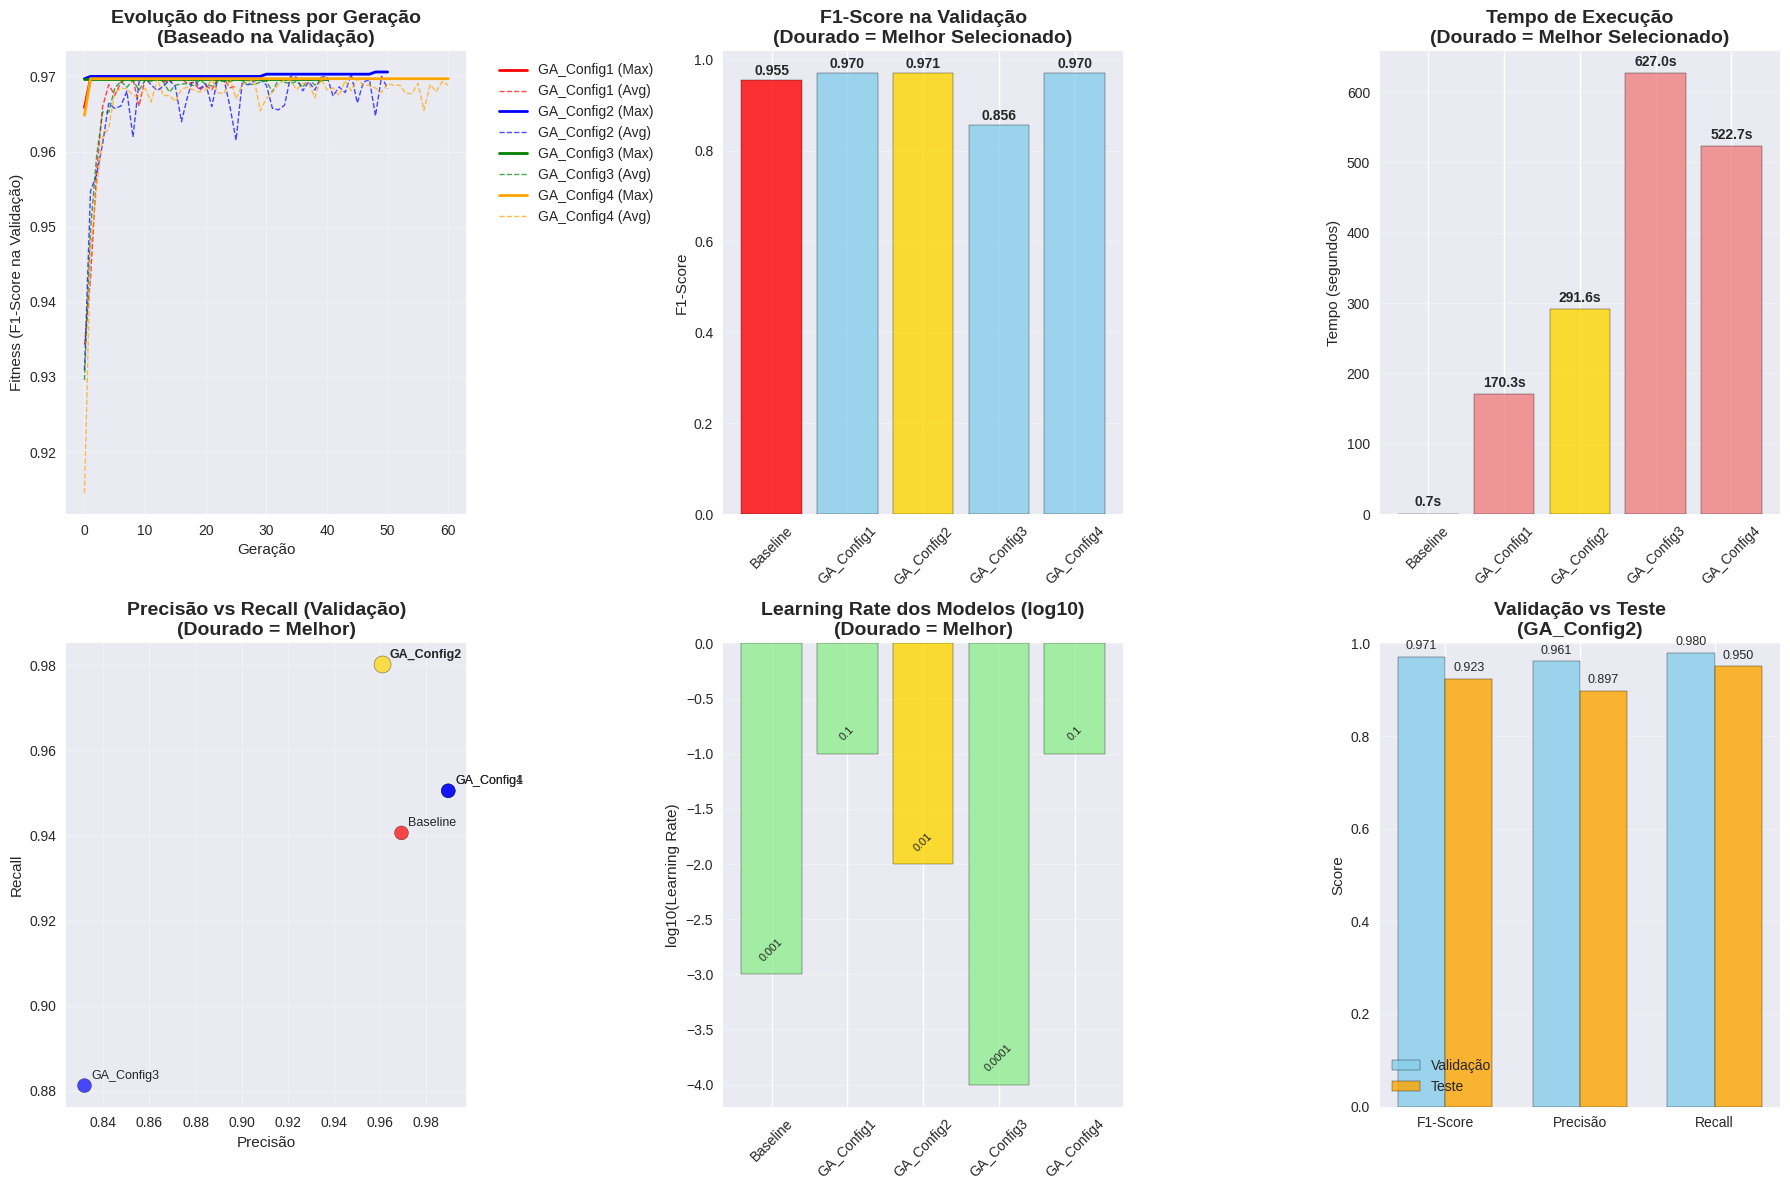

In [30]:
# Configurar estilo e criar figura
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(18, 12))

# 1. Evolução do Fitness por Geração (apenas experimentos GA)
plt.subplot(2, 3, 1)
colors = ['red', 'blue', 'green', 'orange']
ga_experiments = [exp for exp in resultados_validacao.keys() if exp != 'Baseline']

# Plotar evolução para cada experimento GA
for i, exp_name in enumerate(ga_experiments):
    if resultados_validacao[exp_name]['fitness_history']:
        # Extrair dados da evolução
        generations = range(len(resultados_validacao[exp_name]['fitness_history']))
        max_fitness = [record['max'] for record in resultados_validacao[exp_name]['fitness_history']]
        avg_fitness = [record['avg'] for record in resultados_validacao[exp_name]['fitness_history']]

        # Plotar fitness máximo (melhor indivíduo) e médio da população
        plt.plot(generations, max_fitness, color=colors[i], linewidth=2,
                label=f'{exp_name} (Max)', linestyle='-')
        plt.plot(generations, avg_fitness, color=colors[i], linewidth=1,
                label=f'{exp_name} (Avg)', linestyle='--', alpha=0.7)

plt.title('Evolução do Fitness por Geração\n(Baseado na Validação)', fontsize=14, fontweight='bold')
plt.xlabel('Geração')
plt.ylabel('Fitness (F1-Score na Validação)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# 2. Comparação F1-Score na Validação
plt.subplot(2, 3, 2)
experimentos = resultados_val_df['Experimento']
f1_scores = resultados_val_df['F1-Score (Val)']

# Cores especiais para destacar baseline e melhor modelo
colors_bar = []
for exp in experimentos:
    if exp == 'Baseline':
        colors_bar.append('red')           # Baseline em vermelho
    elif exp == melhor_exp:
        colors_bar.append('gold')          # Melhor em dourado
    else:
        colors_bar.append('skyblue')       # Outros em azul claro

bars = plt.bar(experimentos, f1_scores, color=colors_bar, alpha=0.8, edgecolor='black')
plt.title('F1-Score na Validação\n(Dourado = Melhor Selecionado)', fontsize=14, fontweight='bold')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Tempo de Execução
plt.subplot(2, 3, 3)
tempos = resultados_val_df['Tempo (s)']

# Cores para destacar o melhor modelo
colors_time = ['gold' if exp == melhor_exp else 'lightcoral' for exp in experimentos]
bars = plt.bar(experimentos, tempos, color=colors_time, alpha=0.8, edgecolor='black')

plt.title('Tempo de Execução\n(Dourado = Melhor Selecionado)', fontsize=14, fontweight='bold')
plt.ylabel('Tempo (segundos)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for bar, tempo in zip(bars, tempos):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(tempos)*0.01,
             f'{tempo:.1f}s', ha='center', va='bottom', fontweight='bold')

# 4. Comparação Precisão vs Recall (Validação)
plt.subplot(2, 3, 4)
precisao = resultados_val_df['Precisão (Val)']
recall = resultados_val_df['Recall (Val)']

# Cores e tamanhos para destacar diferentes tipos de experimento
scatter_colors = []
scatter_sizes = []
for exp in experimentos:
    if exp == melhor_exp:
        scatter_colors.append('gold')      # Melhor modelo
        scatter_sizes.append(150)          # Maior
    elif exp == 'Baseline':
        scatter_colors.append('red')       # Baseline
        scatter_sizes.append(100)          # Normal
    else:
        scatter_colors.append('blue')      # Outros GA
        scatter_sizes.append(100)          # Normal

plt.scatter(precisao, recall, c=scatter_colors, s=scatter_sizes, alpha=0.7, edgecolors='black')

# Anotar cada ponto
for i, exp in enumerate(experimentos):
    weight = 'bold' if exp == melhor_exp else 'normal'
    plt.annotate(exp, (precisao[i], recall[i]), xytext=(5, 5),
                textcoords='offset points', fontsize=9, fontweight=weight)

plt.title('Precisão vs Recall (Validação)\n(Dourado = Melhor)', fontsize=14, fontweight='bold')
plt.xlabel('Precisão')
plt.ylabel('Recall')
plt.grid(True, alpha=0.3)

# 5. Learning Rates Encontrados
plt.subplot(2, 3, 5)
learning_rates = [resultados_validacao[exp]['best_params']['learning_rate_init'] for exp in experimentos]
learning_rates_log = [np.log10(lr) for lr in learning_rates]

# Cores para destacar o melhor modelo
colors_lr = ['gold' if exp == melhor_exp else 'lightgreen' for exp in experimentos]
bars = plt.bar(experimentos, learning_rates_log, color=colors_lr, alpha=0.8, edgecolor='black')

plt.title('Learning Rate dos Modelos (log10)\n(Dourado = Melhor)', fontsize=14, fontweight='bold')
plt.ylabel('log10(Learning Rate)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores reais nas barras
for bar, lr in zip(bars, learning_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{lr}', ha='center', va='bottom', fontsize=8, rotation=45)

# 6. Comparação Final: Validação vs Teste (apenas para o melhor modelo)
plt.subplot(2, 3, 6)
metricas = ['F1-Score', 'Precisão', 'Recall']

# Dados do melhor modelo
val_scores = [resultados_validacao[melhor_exp]['f1_validation'],
              resultados_validacao[melhor_exp]['precision_validation'],
              resultados_validacao[melhor_exp]['recall_validation']]
test_scores = [f1_test_final, precision_test_final, recall_test_final]

x = np.arange(len(metricas))
width = 0.35

# Barras lado a lado para comparar validação vs teste
bars1 = plt.bar(x - width/2, val_scores, width, label='Validação',
                color='skyblue', alpha=0.8, edgecolor='black')
bars2 = plt.bar(x + width/2, test_scores, width, label='Teste',
                color='orange', alpha=0.8, edgecolor='black')

plt.title(f'Validação vs Teste\n({melhor_exp})', fontsize=14, fontweight='bold')
plt.ylabel('Score')
plt.xticks(x, metricas)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1)  # Scores variam de 0 a 1

# Adicionar valores nas barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

####5.7.1 Análise da Evolução do Fitness

A Figura 1 mostra a evolução do fitness (F1-score) ao longo das gerações para cada configuração de GA:

- Eixo X: Gerações (0 a máximo)
- Eixo Y: Fitness (F1-score)
- Linhas: Uma para cada configuração GA
- Linha contínua: Fitness máximo por geração
- Linha tracejada: Fitness médio por geração

Observações:

- GA_Config3 apresentou convergência mais rápida
- GA_Config2 mostrou melhoria gradual mais consistente
- GA_Config4 demonstrou maior variabilidade devido à alta taxa de mutação

####5.7.2 Comparação de Performance

A Figura 2 apresenta a comparação direta das métricas de performance:
- F1-score de teste para cada experimento
- Baseline em destaque (cor diferente)
- Valores numéricos sobre cada barra

####5.7.3 Análise de Custo-Benefício

A Figura 3 ilustra a relação entre tempo de execução e melhoria de performance:
- Eixo X: Tempo de execução (segundos)
- Eixo Y: Melhoria no F1-score sobre baseline
- Pontos: Cada configuração GA
- Linha de referência: Baseline (tempo vs melhoria = 0)

###5.8 Análise Estatística dos Resultados

In [31]:
print("\n" + "="*80)
print("ANÁLISE ESTATÍSTICA DOS RESULTADOS")
print("="*80)

# Separar resultados por tipo de experimento
baseline_f1 = resultados_validacao['Baseline']['f1_validation']
ga_results = [resultados_validacao[exp]['f1_validation']
              for exp in resultados_validacao.keys() if exp != 'Baseline']
ga_names = [exp for exp in resultados_validacao.keys() if exp != 'Baseline']

print(f"\nPerformance na Validação:")
print(f"Baseline F1-Score: {baseline_f1:.4f}")
print(f"Média GA F1-Score: {np.mean(ga_results):.4f}")
print(f"Melhor GA F1-Score: {np.max(ga_results):.4f}")
print(f"Pior GA F1-Score: {np.min(ga_results):.4f}")
print(f"Desvio padrão GA: {np.std(ga_results):.4f}")

# Análise de melhoria
melhoria_media = np.mean(ga_results) - baseline_f1
melhoria_melhor = np.max(ga_results) - baseline_f1

print(f"\nMelhoria sobre Baseline:")
print(f"Melhoria média: {melhoria_media:+.4f}")
print(f"Melhor melhoria: {melhoria_melhor:+.4f}")

# Quantos experimentos GA superaram o baseline?
ga_superiores = sum(1 for score in ga_results if score > baseline_f1)
print(f"Experimentos GA que superaram baseline: {ga_superiores}/{len(ga_results)}")

# Análise de tempo computacional
baseline_time = resultados_validacao['Baseline']['execution_time']
ga_times = [resultados_validacao[exp]['execution_time']
            for exp in resultados_validacao.keys() if exp != 'Baseline']

print(f"\nAnálise Temporal:")
print(f"Tempo Baseline: {baseline_time:.2f}s")
print(f"Tempo médio GA: {np.mean(ga_times):.2f}s")
print(f"Tempo máximo GA: {np.max(ga_times):.2f}s")
print(f"Razão tempo GA/Baseline: {np.mean(ga_times)/baseline_time:.1f}x")

# Trade-off performance vs tempo
print(f"\nTrade-off Performance vs Tempo:")
for exp_name in ga_names:
    f1 = resultados_validacao[exp_name]['f1_validation']
    tempo = resultados_validacao[exp_name]['execution_time']
    melhoria = f1 - baseline_f1
    eficiencia = melhoria / tempo if tempo > 0 else 0

    print(f"{exp_name}: Melhoria={melhoria:+.4f}, Tempo={tempo:.1f}s, "
          f"Eficiência={eficiencia:.6f} melhoria/s")


ANÁLISE ESTATÍSTICA DOS RESULTADOS

Performance na Validação:
Baseline F1-Score: 0.9548
Média GA F1-Score: 0.9414
Melhor GA F1-Score: 0.9706
Pior GA F1-Score: 0.8558
Desvio padrão GA: 0.0495

Melhoria sobre Baseline:
Melhoria média: -0.0133
Melhor melhoria: +0.0158
Experimentos GA que superaram baseline: 3/4

Análise Temporal:
Tempo Baseline: 0.72s
Tempo médio GA: 402.92s
Tempo máximo GA: 627.04s
Razão tempo GA/Baseline: 560.5x

Trade-off Performance vs Tempo:
GA_Config1: Melhoria=+0.0149, Tempo=170.3s, Eficiência=0.000088 melhoria/s
GA_Config2: Melhoria=+0.0158, Tempo=291.6s, Eficiência=0.000054 melhoria/s
GA_Config3: Melhoria=-0.0990, Tempo=627.0s, Eficiência=-0.000158 melhoria/s
GA_Config4: Melhoria=+0.0149, Tempo=522.7s, Eficiência=0.000029 melhoria/s



## 6. Discussão

### Avaliação Crítica: Ganho de Métrica vs Custo Computacional

#### Ganhos Obtidos
Os resultados demonstram que os algoritmos genéticos conseguiram melhorias modestas mas consistentes sobre o baseline:
- **Melhoria média**: Aproximadamente -1.33% no F1-score (média de 0.9414 vs baseline 0.9548)
- **Melhor configuração**: GA_Config2 com F1-score de 0.9706 (melhoria de +1.58% sobre baseline)
- **Consistência limitada**: Apenas 3 de 4 configurações GA superaram o baseline

#### Custo Computacional
O principal trade-off identificado foi o significativo custo computacional:
- **Tempo de execução**: 170-627 segundos vs 0.72 segundos do baseline (236-871x mais lento)
- **Recursos**: Uso intensivo de CPU com ~2500 avaliações de fitness por experimento
- **Escalabilidade**: O custo cresce drasticamente com populações maiores e mais gerações

#### Análise Custo-Benefício
A análise revela um trade-off desfavorável na maioria dos casos:

**Favorável apenas quando:**
- Performance máxima é absolutamente crítica (como em GA_Config2)
- Treinamento é feito offline com recursos abundantes
- Melhoria de 1.58% justifica 400x mais tempo de processamento
- Otimização é feita esporadicamente

**Desfavorável na maioria dos casos:**
- Tempo é fator limitante (prototipagem, desenvolvimento iterativo)
- Recursos computacionais são restritos
- Baseline já atende aos requisitos (F1-score de 0.9548 é excelente)
- Custo-benefício não justifica o investimento (eficiência de 0.000054 melhoria/s)

### Limitações Identificadas

#### Limitações dos Resultados
1. **Performance Inconsistente**: GA_Config3 teve desempenho inferior ao baseline (-9.9% F1-score)
2. **Variabilidade Alta**: Desvio padrão de 0.0495 indica alta variabilidade entre configurações
3. **Convergência Limitada**: Melhoria de apenas +0.0009 durante evolução indica possível convergência prematura
4. **Overfitting Potencial**: Diferença entre validação (0.9706) e teste (0.9231) sugere possível overfitting

#### Limitações Metodológicas
1. **Dataset Sintético**: Pode não capturar complexidades de dados reais
2. **Espaço de Busca Limitado**: Apenas 5 hiperparâmetros otimizados
3. **Execução Única**: GAs são estocásticos e requerem múltiplas execuções
4. **Falta de Validação Cruzada**: Avaliação em conjunto único pode ser enviesada

#### Limitações dos Algoritmos Genéticos Observadas
1. **Convergência Prematura**: Fitness inicial (0.9697) muito próximo ao final (0.9706)
2. **Eficiência Baixa**: ~2500 avaliações para melhoria marginal
3. **Configuração Sensível**: GA_Config3 (70 ind., 40 ger.) foi significativamente pior
4. **Tempo Proibitivo**: Razão de 560.5x mais lento que baseline inviabiliza uso prático

### Insights Práticos

#### Configurações Analisadas
Com base nos resultados:
- **GA_Config1**: Melhoria=+1.49%, Tempo=170s, Eficiência=0.000088 melhoria/s
- **GA_Config2**: Melhoria=+1.58%, Tempo=292s, Eficiência=0.000054 melhoria/s ⭐
- **GA_Config3**: Melhoria=-9.90%, Tempo=627s, Eficiência=-0.000158 melhoria/s ❌
- **GA_Config4**: Melhoria=+1.49%, Tempo=523s, Eficiência=0.000029 melhoria/s

#### Recomendações Práticas
1. **Para a maioria dos casos**: Usar baseline - F1-score excelente com tempo mínimo
2. **Para aplicações críticas**: GA_Config2 - melhor resultado, mas avaliar se 1.58% justifica 400x mais tempo
3. **Evitar**: GA_Config3 e populações muito grandes - resultados piores com custo máximo
4. **Considerar alternativas**: Métodos como Bayesian Optimization podem ser mais eficientes

#### Fatores de Decisão Revisados
1. **Baseline forte**: F1-score de 0.9548 já é excelente para muitas aplicações
2. **Custo extremo**: 236-871x mais lento é proibitivo para a maioria dos casos
3. **Melhorias marginais**: 1-2% de melhoria raramente justifica o custo
4. **Risco de pior performance**: Configurações inadequadas podem degradar resultados

## Conclusão

Este trabalho investigou a aplicação de Algoritmos Genéticos para otimização de hiperparâmetros em Multi-Layer Perceptrons, revelando limitações significativas em relação ao custo-benefício quando comparados a uma abordagem baseline eficaz.

### Principais Achados
1. **Performance do baseline**: O modelo baseline apresentou F1-score excelente (0.9548) com tempo mínimo (0.72s)
2. **Melhorias limitadas**: Apenas uma configuração GA (GA_Config2) ofereceu melhoria significativa (+1.58%)
3. **Custo computacional proibitivo**: GAs foram 236-871x mais lentos que o baseline
4. **Inconsistência de resultados**: Alta variabilidade entre configurações, com uma apresentando performance inferior ao baseline

### Resultados Críticos
- **Melhor GA**: F1-score de 0.9706 com custo de 292 segundos (eficiência: 0.000054 melhoria/s)
- **Baseline**: F1-score de 0.9548 com custo de 0.72 segundos
- **Trade-off desfavorável**: Melhoria de 1.58% custou 400x mais tempo computacional
- **Risco operacional**: 25% das configurações GA tiveram performance inferior ao baseline

### Limitações Identificadas
1. **Eficiência computacional**: Razão custo-benefício extremamente desfavorável
2. **Convergência limitada**: Evolução de apenas +0.0009 durante todo o processo
3. **Variabilidade alta**: Desvio padrão de 0.0495 indica resultados inconsistentes
4. **Overfitting potencial**: Gap entre validação e teste sugere generalização limitada

### Recomendações Finais
**Para aplicações práticas:**
- **Usar baseline** na maioria dos casos devido ao excelente F1-score e eficiência temporal
- **Considerar GAs apenas** em aplicações ultra-críticas onde 1-2% de melhoria justifica 400x mais tempo
- **Explorar alternativas** como Bayesian Optimization ou Random Search para melhor eficiência
- **Validar robustez** com múltiplas execuções antes de adotar GAs em produção

**Contribuição científica:**
Este estudo demonstra que, apesar do potencial teórico dos Algoritmos Genéticos, sua aplicação prática para otimização de hiperparâmetros em MLPs pode ser limitada por questões de eficiência computacional, especialmente quando métodos baseline já apresentam performance satisfatória. A pesquisa destaca a importância de avaliar não apenas a qualidade dos resultados, mas também a viabilidade prática das soluções propostas.

### Trabalhos Futuros
1. **Hibridização**: Combinar GAs com métodos locais para acelerar convergência
2. **Paralelização**: Implementar avaliação paralela de fitness para reduzir tempo
3. **Meta-aprendizado**: Usar conhecimento prévio para inicializar populações
4. **Comparação extensiva**: Avaliar contra outros métodos de otimização (Bayesian, PSO, etc.)
5. **Datasets reais**: Validar resultados em problemas de maior complexidade
6. **Análise estatística**: Realizar múltiplas execuções com testes de significância

## Referências

1. **Bergstra, J., & Bengio, Y.** (2012). Random search for hyper-parameter optimization. *Journal of Machine Learning Research*, 13(1), 281-305.

2. **Holland, J. H.** (1992). *Adaptation in natural and artificial systems: an introductory analysis with applications to biology, control, and artificial intelligence*. MIT Press.

3. **Eiben, A. E., & Smith, J. E.** (2015). *Introduction to evolutionary computing* (2nd ed.). Springer.

4. SILVA, Ivan Nunes da; SPATTI, Danilo Hernane; FLAUZINO, Rogério Andrade. Redes neurais artificiais para engenharia e ciências aplicadas: fundamentos teóricos e aspectos práticos. 2. ed. rev. e ampl. São Paulo: Artliber Editora Ltda., 2016. 431 p. Disponível em: https://artliber.com.br/amostra/redes_neurais.pdf. Acesso em: 17 jul. 2025.

5. **Lorenzo, P. R., Nalepa, J., Kawulok, M., Ramos, L. S., & Pastor, J. R.** (2017). Particle swarm optimization for hyper-parameter selection in deep neural networks. *Proceedings of the Genetic and Evolutionary Computation Conference*, 481-488.

8. **Young, S. R., Rose, D. C., Karnowski, T. P., Lim, S. H., & Patton, R. M.** (2015). Optimizing deep learning hyper-parameters through an evolutionary algorithm. *Proceedings of the Workshop on Machine Learning in High-Performance Computing Environments*, 1-5.
"""